# 3 - OpenCV

<br>
<br>

<img src="https://raw.githubusercontent.com/Hack-io-AI/ai_images/main/opencv.webp" style="width:400px;"/>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1---¿Qué-es-OpenCV?" data-toc-modified-id="1---¿Qué-es-OpenCV?-1">1 - ¿Qué es OpenCV?</a></span></li><li><span><a href="#2---Procesamiento-de-imágenes" data-toc-modified-id="2---Procesamiento-de-imágenes-2">2 - Procesamiento de imágenes</a></span><ul class="toc-item"><li><span><a href="#2.1---Lectura-y-escritura" data-toc-modified-id="2.1---Lectura-y-escritura-2.1">2.1 - Lectura y escritura</a></span></li><li><span><a href="#2.2---Transformación-de-imágenes" data-toc-modified-id="2.2---Transformación-de-imágenes-2.2">2.2 - Transformación de imágenes</a></span></li><li><span><a href="#2.3---Aplicación-de-filtros" data-toc-modified-id="2.3---Aplicación-de-filtros-2.3">2.3 - Aplicación de filtros</a></span></li></ul></li><li><span><a href="#3---Visión-por-computador" data-toc-modified-id="3---Visión-por-computador-3">3 - Visión por computador</a></span><ul class="toc-item"><li><span><a href="#3.1---Reconocimiento-de-contornos" data-toc-modified-id="3.1---Reconocimiento-de-contornos-3.1">3.1 - Reconocimiento de contornos</a></span></li><li><span><a href="#3.2---Reconocimiento-de-caras" data-toc-modified-id="3.2---Reconocimiento-de-caras-3.2">3.2 - Reconocimiento de caras</a></span></li><li><span><a href="#3.3---Reconocimiento-de-cuerpos-completo" data-toc-modified-id="3.3---Reconocimiento-de-cuerpos-completo-3.3">3.3 - Reconocimiento de cuerpos completo</a></span></li><li><span><a href="#3.4---Reconocimiento-de-sonrisas" data-toc-modified-id="3.4---Reconocimiento-de-sonrisas-3.4">3.4 - Reconocimiento de sonrisas</a></span></li></ul></li><li><span><a href="#4---Operaciones-de-vídeo" data-toc-modified-id="4---Operaciones-de-vídeo-4">4 - Operaciones de vídeo</a></span></li></ul></div>

## 1 - ¿Qué es OpenCV?

[OpenCV](https://opencv.org/) (Open Source Computer Vision Library) es una biblioteca de visión artificial y aprendizaje automático de código abierto. OpenCV fue diseñado para proporcionar una infraestructura común para aplicaciones de visión por computadora y acelerar el uso de la percepción artificial en productos comerciales. Es una biblioteca que incluye más de 2500 algoritmos optimizados para visión por computadora y aprendizaje automático. Estos algoritmos pueden ser usados para detectar y reconocer rostros, identificar objetos, clasificar acciones humanas en vídeos, rastrear movimientos, extraer modelos 3D de objetos o producir imágenes de alta resolución a partir de varias imágenes más pequeñas.


**Funcionalidades Principales de OpenCV**


1. **Procesamiento de imágenes**: 
    + Lectura y escritura de imágenes.
    + Redimensionado, recorte, rotación y transformación de imágenes.
    + Aplicación de filtros, desenfoque, detección de bordes o suavizado.


2. **Visión por computador**:
    + Detección de características, bordes, esquinas o puntos clave.
    + Reconocimiento de patrones y clasificación de objetos.
    + Detección de rostros y objetos en tiempo real.


3. **Operaciones de vídeo**:
    + Captura y procesamiento de vídeo en tiempo real.
    + Análisis y seguimiento de objetos en vídeo.
    + Compresión y descompresión de vídeo.



Para instalar la librería ejecutamos el siguiente comando:
```bash
pip install opencv-python
```

## 2 - Procesamiento de imágenes

Vamos a ver cómo leer y guardar imágenes, además de realizar algunas transformaciones sobre ellas como recortes, rotaciones o desenfoque. Primero importamos la librería:

In [1]:
# importamos OpenCV

import cv2

### 2.1 - Lectura y escritura

Cargamos ahora una imagen que tenemos guardada en local. Veremos cuál es el tipo de dato, cómo visualizarla y cómo se guarda una imagen con OpenCV.

In [2]:
# ruta a una imagen en local

ruta = '../../images/shinjuku.jpeg'

In [3]:
# carga de la imagen

imagen = cv2.imread(filename=ruta)

Podemos visualizar la imagen fuera del jupyter con el siguiente comand:

```python
cv2.imshow('Shinjuku', imagen)
```

In [4]:
# tipo de dato de la imagen

type(imagen)

numpy.ndarray

In [5]:
# dimensiones de la imagen

imagen.shape

(183, 275, 3)

Vemos que el tipo de dato de la imagen cargada con OpenCV es un array de numpy, por lo que no podemos visualizar directamente la imagen. El array tiene dimensiones (183, 275, 3), que indica que la imagen tiene 183 píxeles de alto, 275 píxeles de ancho y 3 canales, rojo, verde y azul. Para visualizar la imagen desde el array usaremos la librería PIL.

In [6]:
# importamos PIL

from PIL import Image

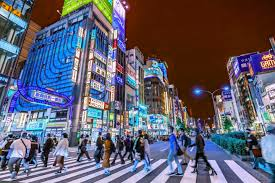

In [7]:
# convertimos el array de numpy a imagen

Image.fromarray(obj=imagen)

Podríamos manejar al imagen con PIL desde aquí, pero la ventaja de OpenCV es que está manejando un array de numpy, por lo que podemos hacer transformaciones directamente manejando dicho array a través de los valores que tiene, entre 0 y 255. 0 se corresponde con apagado y 255 con encendido. Veamos un ejemplo de filtro:

In [8]:
# importamos numpy

import numpy as np

In [9]:
# filtro del array, ponemos 0 si el pixel tiene un valor mayor de 180

filtro = np.where(imagen < 180, 0, imagen)

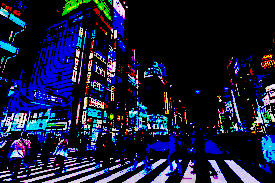

In [10]:
# visualizamos la imagen filtrada

Image.fromarray(obj=filtro)

Con el nuevo array de numpy podemos guardar la imagen con OpenCV en la ruta especificada. El formato de la imagen se establece en la propia ruta.

In [11]:
# guardado

ruta_guardado = '../../images/shinjuku_fade.jpeg'

cv2.imwrite(filename=ruta_guardado, img=filtro)

True

### 2.2 - Transformación de imágenes

Veamos ahora cómo realizar algunas transformaciones de las imágenes con OpenCV como el redimensionado de la imagen, la rotación, la transposición o el recorte de imágenes.

**Cambio de dimensiones de la imagen**

In [12]:
# dimensiones de la imagen original

imagen.shape

(183, 275, 3)

In [13]:
# redimensionado

dimensiones = (100 ,100)

nueva_imagen = cv2.resize(src=imagen, dsize=dimensiones)

nueva_imagen.shape

(100, 100, 3)

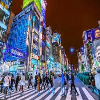

In [14]:
# visualizacion de la imagen

Image.fromarray(obj=nueva_imagen)

**Rotación de la imagen**

Para rotar una imagen en OpenCV tenemos que definir primero tenemos que definir el punto de rotación y la [matriz de rotación](https://es.wikipedia.org/wiki/Matriz_de_rotaci%C3%B3n), una matriz usada en álgebra lineal para rotar matrices en el espacio euclídeo. Vayamos paso a paso:

In [15]:
# definimos el ancho y alto de la imagen

altura, ancho = imagen.shape[:2]

altura, ancho

(183, 275)

In [16]:
# definimos el punto de rotación, el centro de la imagen por ejemplo

punto_rotacion = (ancho//2, altura//2)

punto_rotacion

(137, 91)

In [17]:
# definimos el angulo de rotación en grados, antihorario

angulo = 45

In [18]:
# ahora construimos la matriz de rotación

matriz_rotacion = cv2.getRotationMatrix2D(center=punto_rotacion, angle=angulo, scale=1.0)

matriz_rotacion

array([[  0.70710678,   0.70710678, -24.22034611],
       [ -0.70710678,   0.70710678, 123.52691193]])

In [19]:
# rotación de la imagen

rotacion = cv2.warpAffine(src=imagen, M=matriz_rotacion, dsize=(ancho, altura))

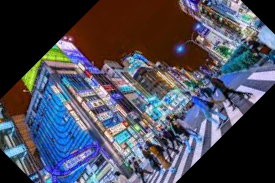

In [20]:
# visualización

Image.fromarray(rotacion)

**Transposición de la imagen**

Aunque podríamos transponer la imagen directamente con el array de numpy, aunque OpenCV tiene un método llamado `flip` para hacerlo cómodamente. Dicho método tiene un argumento, `flipCode`, el cual si tiene valor 0 la imagen se transpone verticalmente, si tiene valor mayor que 0 la imagen se transpone horizontalmente y si el valor es menor que 0 se transpone en ambos ejes.

In [21]:
# transposición

transpuesta = cv2.flip(src=imagen, flipCode=-1)

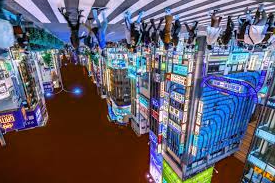

In [22]:
# visualización

Image.fromarray(obj=transpuesta)

**Recorte de la imagen**

La manera más cómoda de hacer esto es usando el slicing del array de numpy, seleccionando directamente de que pixel a que pixel, tanto en ancho como alto, queremos seleccionar.

In [23]:
# recorte

recorte = imagen[100:200, 0:100]

recorte.shape

(83, 100, 3)

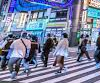

In [24]:
# visualización

Image.fromarray(obj=recorte)

### 2.3 - Aplicación de filtros

Vamos a aplicar algunos filtros a las imágenes tales como el desenfoque, extracción de umbrales o aplicación de máscaras. Empecemos con el desenfoque. 

**Desenfoque de la imagen**

El desenfoque (blur) de OpenCV recibe la imagen original y estable el enfoque con una parámetro llamado kernel size (ksize), el cual es una tupla de dos elementos para desenfocar en los dos ejes de la imagen por separado. Ambos valores han de ser enteros mayores que cero.

In [25]:
# desenfoque

desenfoque = cv2.blur(src=imagen, ksize=(10, 10))

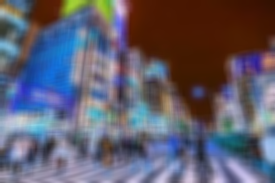

In [26]:
# visualización

Image.fromarray(obj=desenfoque)

**Umbrales de la imagen**

El umbral de una imagen en OpenCV es una técnica de procesamiento de imágenes que se utiliza para segmentar o binarizar una imagen. La idea principal detrás del umbral es convertir una imagen en escala de grises en una imagen binaria, blanco y negro, donde los píxeles se clasifican en dos grupos, aquellos que están por encima de un valor de umbral y aquellos que están por debajo de ese valor. Podríamos hacer esto directamente con np.where como hicimos anteriormente, pero OpenCV tiene métodos para ello.

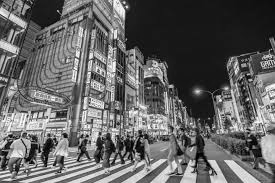

In [27]:
# conversión a escala de grises

gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)

Image.fromarray(gris)

El objeto `cv2.COLOR_BGR2GRAY` es una constante de OpenCV utilizada para especificar el tipo de conversión de color, en formato BGR, azul, verde y rojo, a una imagen en escala de grises.

In [28]:
# umbral en valor 150, si está por debajo 0, si está por encima 255

binario = cv2.threshold(src=gris, thresh=150, maxval=255, type=cv2.THRESH_BINARY)

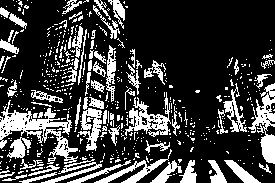

In [29]:
# visualización 

Image.fromarray(binario[1])

El objeto `cv2.THRESH_BINARY` especificar el tipo de conversión de escala de grises a binario. El objeto `cv2.THRESH_BINARY_INV` especifica la misma conversión pero en sentido inverso, en negativo.

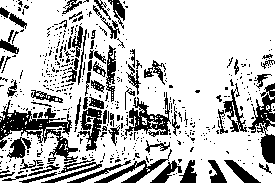

In [30]:
# en negativo

binario_neg = cv2.threshold(src=gris, thresh=150, maxval=255, type=cv2.THRESH_BINARY_INV)

Image.fromarray(binario_neg[1])

**Máscaras**

La máscara actúa como una plantilla o filtro que define qué píxeles de la imagen original deben ser afectados por una operación. Los píxeles blancos, con valor 255, en la máscara indican las áreas que serán procesadas, mientras que los píxeles negros, con valor 0, indican las áreas que se ignorarán. Primero vamos a ver como pintar un círculo y un rectángulo para luego enmascarar la imagen.

Para pintar un círculo creamos una copia de la imagen para dársela como argumento, puesto que pintar en OpenCV sobreescribe el objeto. Además le damos el centro, el radio, color y el grueso de la línea. Si el grueso es un valor negativo, el círculo se rellena de color.

In [31]:
# pintamos el círculo

circulo = cv2.circle(img=imagen.copy(), center=(180, 100), radius=100, color=255, thickness=-1)

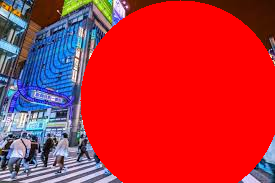

In [32]:
# visualización

Image.fromarray(obj=circulo)

Pintar un rectángulo es similar, salvo que le vamos a dar dos puntos que son los vertices del rectángulo.

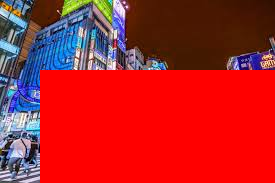

In [33]:
rectangulo = cv2.rectangle(img=imagen.copy(), pt1=(40,70), pt2=(300,300), color=255, thickness=-1)

Image.fromarray(obj=rectangulo)

Para aplicar la máscara a la imagen, vamos a crear primero una imagen en blanco sobre la que vamos a pintar un círculo o un rectángulo. Hacemos esto porque la máscara ha de ser binaria, es decir, solo puede tener valores 0 o 255, no un valor intermedio. La máscara, en definiva, es un filtro, se ve o no se ve.

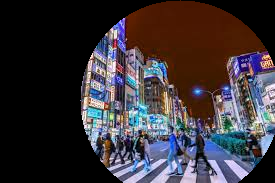

In [34]:
# imagen en blanco con las dimensiones de la imagen original
en_blanco = np.zeros(shape=imagen.shape[:2], dtype='uint8')


# pintamos el círculo
circulo = cv2.circle(img=en_blanco.copy(), center=(180, 100), radius=100, color=255, thickness=-1)


# creamos la nueva imagen enmascarada
mascara = cv2.bitwise_and(src1=imagen, src2=imagen, mask=circulo)

Image.fromarray(obj=mascara)

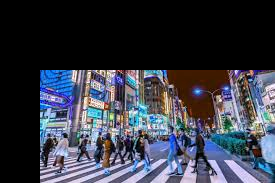

In [35]:
# imagen en blanco con las dimensiones de la imagen original salvo los canales
en_blanco = np.zeros(shape=imagen.shape[:2], dtype='uint8')


# pintamos el rectángulo
rectangulo = cv2.rectangle(img=en_blanco.copy(), pt1=(40,70), pt2=(300,300), color=255, thickness=-1)


# creamos la nueva imagen enmascarada
mascara = cv2.bitwise_and(src1=imagen, src2=imagen, mask=rectangulo)

Image.fromarray(obj=mascara)

## 3 - Visión por computador

Con OpenCV podemos realizar reconocimiento de características de la imagen. Por ejemplo, podemos reconocer los contornos de los objectos que presenta la imagen o podemos reconocer caras, sonrisas o cuerpos completos de personas gracias a modelos prefabricados que la librería nos ofrece. Veamos algunos de estos ejemplos.

### 3.1 - Reconocimiento de contornos

El reconocimiento de contornos se refiere a la extracción de las siluetas de los objectos presentes en la imagen. El primer paso será convertir la imagen a escala de grises y a continuación le aplicamos algo de desenfoque. Esto se hace para extraer los contornos más importantes dentro de la imagen y no todos ellos. Una vez transformada la imagen extraeremos los contornos que posee. Vayamos paso a paso.

In [36]:
# conversión a escala de grises

gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)

In [37]:
# desenfoque de la imagen en escala de grises

desenfoque = cv2.blur(src=gris, ksize=(3, 3))

In [38]:
# encontramos los contornos dentro de la imagen

contorneada = cv2.Canny(image=desenfoque, threshold1=0, threshold2=255)

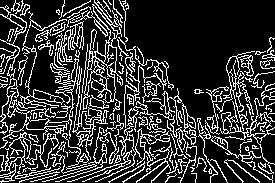

In [39]:
# visualización

Image.fromarray(obj=contorneada)

Podemos extraer los contornos en formato array de la imagen que acabamos de obtener, para guardarlos, para pintarlos en la imagen original si quisieramos o en una imagen en blanco. También podemos extraer la jerarquía que existe entre esos contornos, es decir, la relación entre los contornos detectados en la imagen.

In [40]:
# imagen en blanco con las dimensiones de la imagen original

en_blanco = np.zeros(shape=imagen.shape, dtype='uint8')

In [41]:
# extracción de contornos y jerarquía

contornos, jerarquia = cv2.findContours(image=contorneada, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)

El objeto `cv2.RETR_LIST` recupera todos los contornos, pero no crea ninguna jerarquía entre ellos. En este modo, simplemente se listan todos los contornos encontrados sin ninguna relación padre-hijo. El objeto `cv2.CHAIN_APPROX_SIMPLE` se utiliza para especificar el método de aproximación del contorno. Este método de aproximación reduce el número de puntos almacenados en el contorno, comprimiendo segmentos horizontales, verticales y diagonales, dejando solo los puntos finales de esos segmentos. Esto ahorra memoria y simplifica el procesamiento posterior de los contornos.

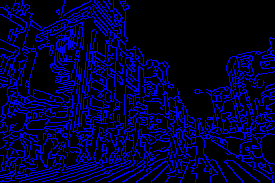

In [42]:
# dibujamos los contornos en la imagen en blanco

n_contorneada = cv2.drawContours(image=en_blanco, 
                                 contours=contornos, 
                                 contourIdx=-1, 
                                 color=(0,0,255), 
                                 thickness=1)

Image.fromarray(obj=n_contorneada)

### 3.2 - Reconocimiento de caras

OpenCV posee internamente clasificadores en cascada basados en características `Haar` utilizados principalmente para la detección de objetos en imágenes y videos. Fueron introducidos por Paul Viola y Michael Jones en su trabajo [Rapid Object Detection using a Boosted Cascade of Simple Features](https://ieeexplore.ieee.org/document/990517) en 2001. Los clasificadores Haarcascade son ampliamente utilizados para la detección de rostros, ojos, sonrisas, cuerpos y otros objetos en imágenes.

Estos clasificadores se encuentran en el directorio haarcascades de la instalación de OpenCV y se guardan con la extensión `.xml`. Vamos a usar el detector de caras en primer lugar.

In [43]:
# ruta que contiene los modelos clasificadores

cv2.data.haarcascades

'/opt/anaconda3/envs/ia/lib/python3.9/site-packages/cv2/data/'

In [44]:
# lista de clasificadores que tiene opencv

import os

os.listdir(cv2.data.haarcascades)

['haarcascade_upperbody.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_profileface.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_eye.xml',
 '__init__.py',
 'haarcascade_lefteye_2splits.xml',
 '__pycache__',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_smile.xml',
 'haarcascade_license_plate_rus_16stages.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_eye_tree_eyeglasses.xml']

El paso a paso es como sigue:

1. Cargamos la imagen.
2. La convertimos a escala de grises.
3. Usamos el modelo para extraer los rectángulos donde están las caras.
4. Pintamos esos rectángulos en la imagen original.

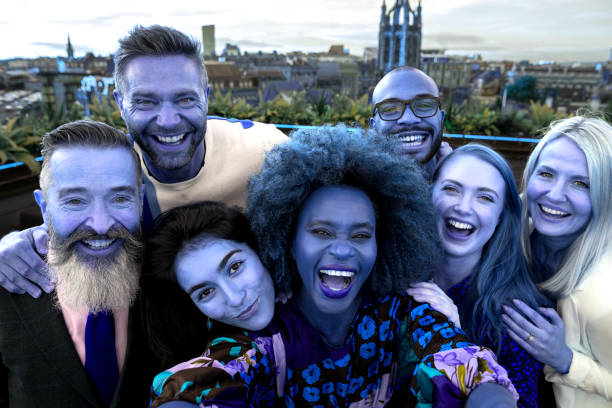

In [45]:
# cargamos la imagen 

imagen = cv2.imread(filename='../../images/group_selfie.jpg')

Image.fromarray(obj=imagen)

In [46]:
# conversión a escala de grises

gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)

In [47]:
# cargamos el modelo haarcascade

modelo = cv2.CascadeClassifier(filename=cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

In [48]:
# extraemos los rectángulos que contienen las caras

rectangulos = modelo.detectMultiScale(image=gris, scaleFactor=1.1, minNeighbors=1)

In [49]:
# x e y del vertice inicial, ancho y alto

rectangulos 

array([[366,  73,  84,  84],
       [118,  64,  97,  97],
       [290, 194, 101, 101],
       [520, 147,  80,  80],
       [425, 159,  86,  86],
       [ 40, 152, 119, 119]], dtype=int32)

El parámetro `scaleFactor` especifica cuánto se reduce el tamaño para detectar los rectángulos y el parámetro `minNeighbors` especifica cuántos vecinos mínimos ha de tener un rectángulo para ser considerado. Cambiando estos parámetros la detección de caras puede mejorar o empeorar.

Una vez que hemos obtenido los rectángulos de las caras, los pintamos de color verde en la imagen original.

In [50]:
# pinta cada rectángulo en la imagen

for x,y,w,h in rectangulos:

    cv2.rectangle(img=imagen, pt1=(x,y), pt2=(x+w,y+h), color=(0,255,0), thickness=2)

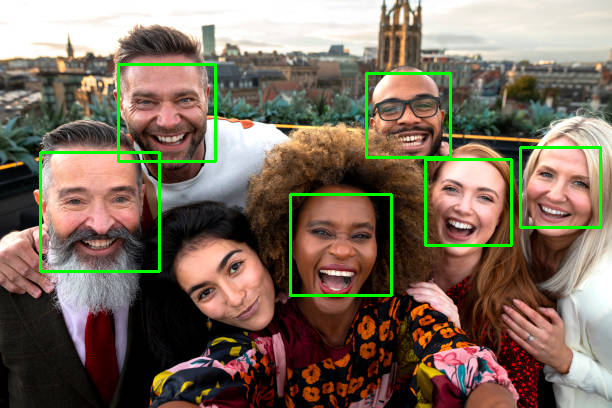

In [51]:
# visualización, con transformación de BGR a RGB

imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

Image.fromarray(imagen)

Como vemos, no siempre funciona correctamente. Probemos con otra imagen.

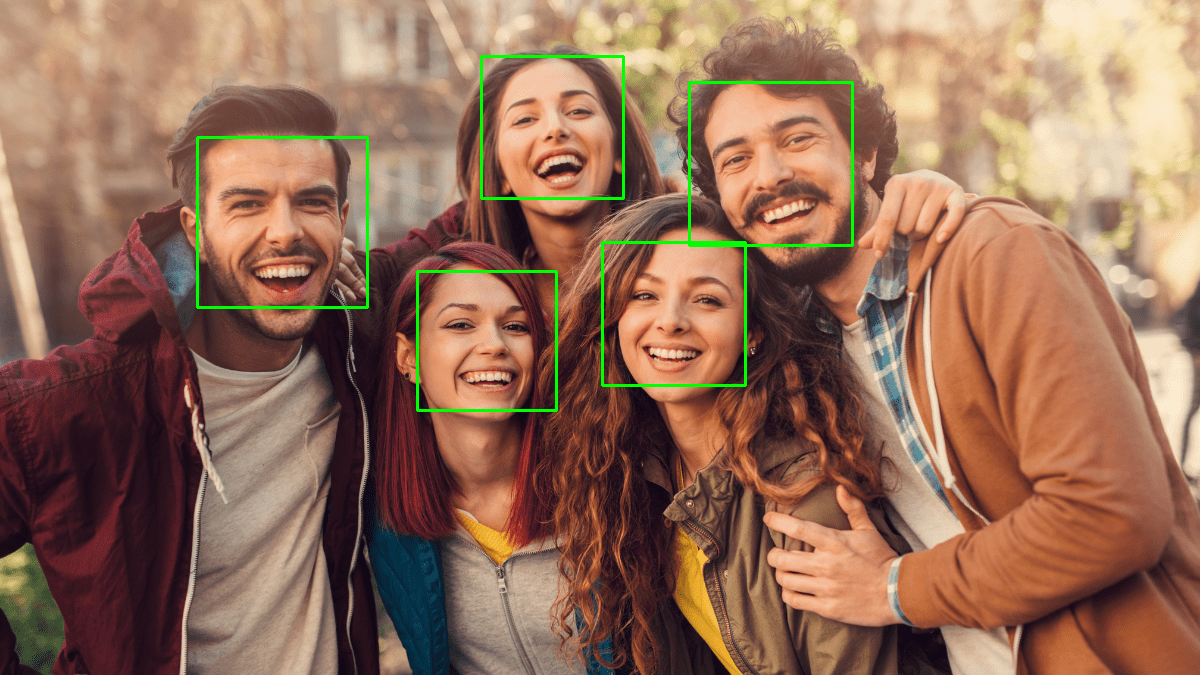

In [52]:
imagen = cv2.imread(filename='../../images/group_selfie2.png')


gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)


modelo = cv2.CascadeClassifier(filename=cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')


rectangulos = modelo.detectMultiScale(image=gris, scaleFactor=1.3, minNeighbors=1)


for x,y,w,h in rectangulos:

    cv2.rectangle(img=imagen, pt1=(x,y), pt2=(x+w,y+h), color=(0,255,0), thickness=2)

    
    
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


Image.fromarray(imagen)

Ahora podríamos crear una función que contenga el anterior cóodigo para usarlo con cualquier imagen. Vamos a ello:

In [53]:
def detectar(ruta_imagen: str, modelo: str, escala: float = 1.3, vecinos: int = 1) -> None:
    
    """
    Esta función recibe la ruta de la imagen, el tipo de modelo, el factor de escala 
    y mínimo de vecinos para enseñar la imagen clasificada.
    
    Params:
    ruta_imagen: string, ruta a la imagen que queremos clasificar
    modelo: string, tipo de modelo haar que vamos a usar
    escala: float, factor de escala
    vecinos: int, número de vecinos
    
    Returns
    None. No devuelve nada, solo nos enseña la imagen clasificada.
    
    """
    
    imagen = cv2.imread(filename=ruta_imagen)


    gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)


    modelo = cv2.CascadeClassifier(filename=cv2.data.haarcascades + modelo)


    rectangulos = modelo.detectMultiScale(image=gris, scaleFactor=escala, minNeighbors=vecinos)


    for x,y,w,h in rectangulos:

        cv2.rectangle(img=imagen, pt1=(x,y), pt2=(x+w,y+h), color=(0,255,0), thickness=2)
        
        
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


    display(Image.fromarray(imagen))

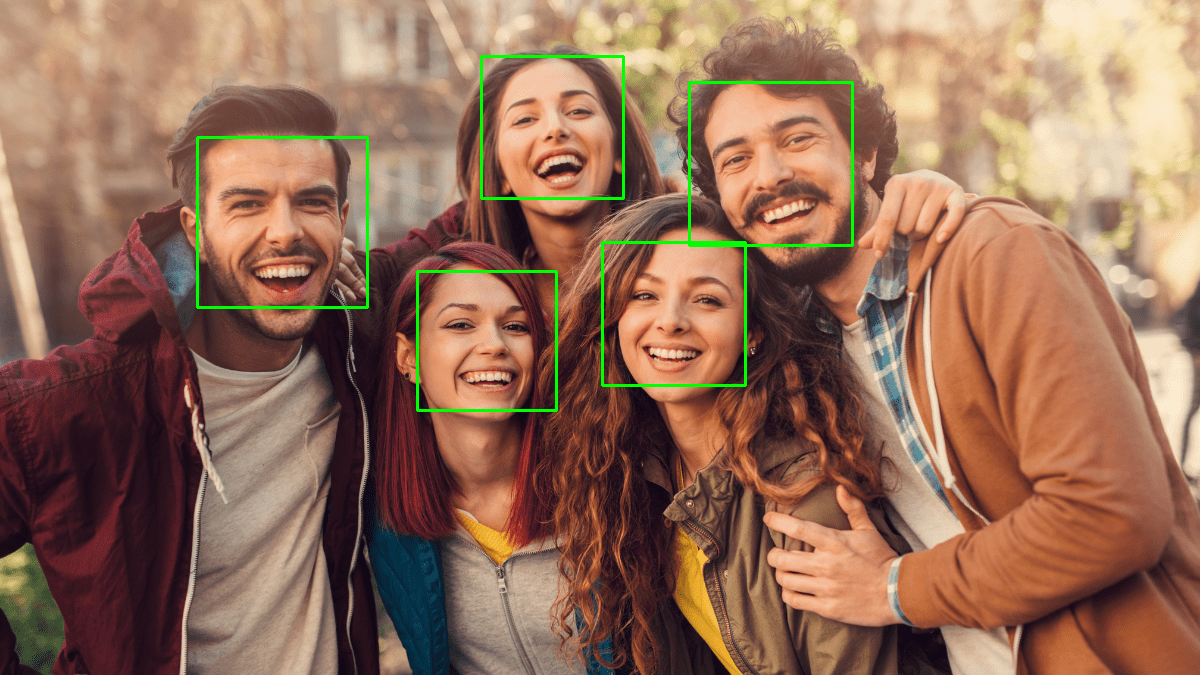

In [54]:
detectar(ruta_imagen='../../images/group_selfie2.png', modelo='haarcascade_frontalface_alt.xml')

### 3.3 - Reconocimiento de cuerpos completo

Ahora vamos a usar otro modelo Haar a través de la función que acabamos de escribir. Usaremos un modelo que es capaz de detectar el cuerpo completo de una persona.

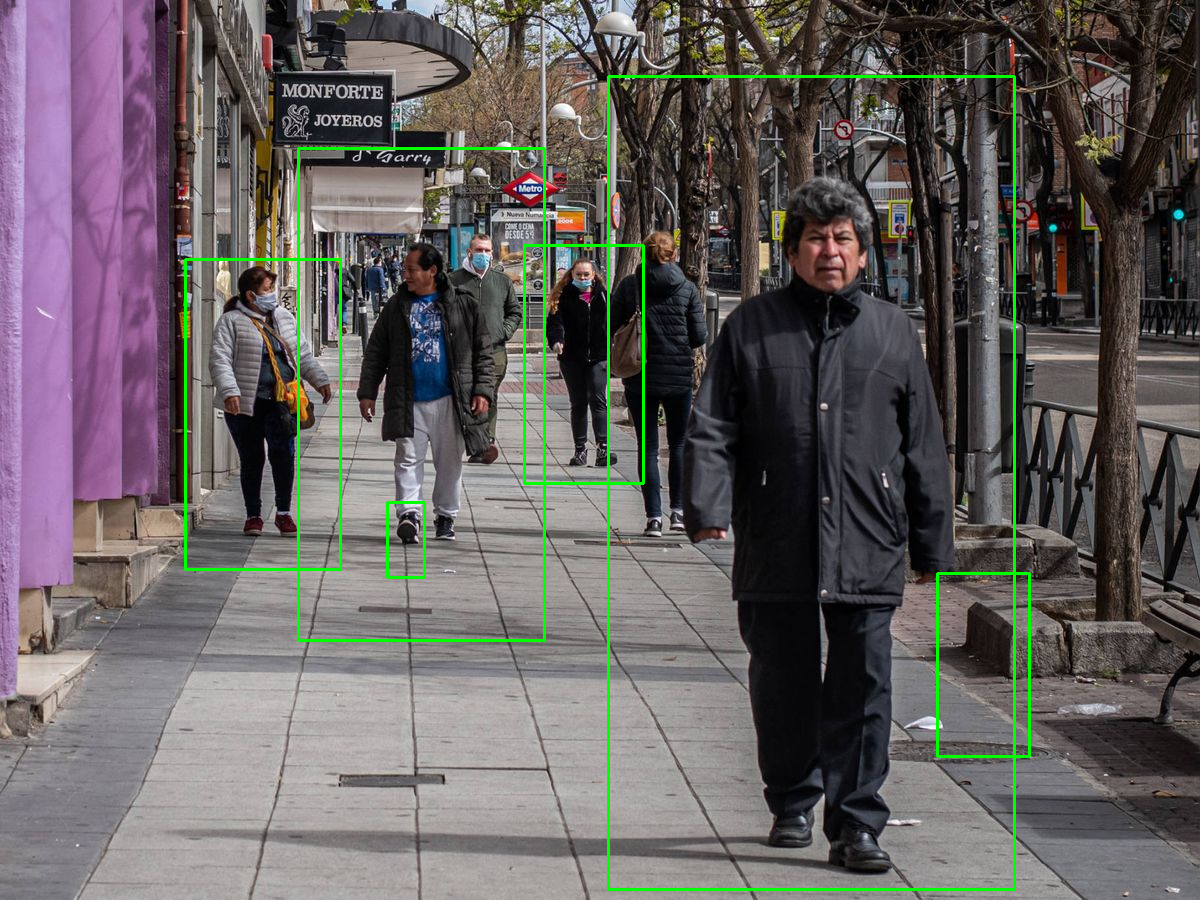

In [55]:
detectar(ruta_imagen='../../images/madrid.jpg', modelo='haarcascade_fullbody.xml', escala=1.1)

### 3.4 - Reconocimiento de sonrisas

Probemos con otro modelo, esta vez el detector de sonrisas.

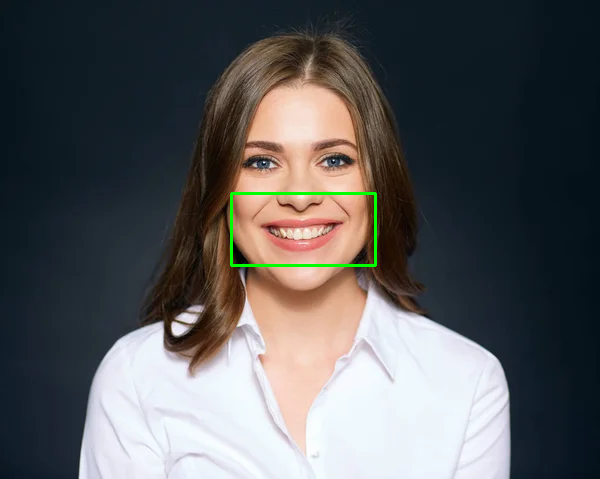

In [56]:
detectar(ruta_imagen='../../images/mujer_sonriente.jpg', 
         modelo='haarcascade_smile.xml', 
         escala=4, 
         vecinos=6)

## 4 - Operaciones de vídeo

Para probar las capacidades de video de OpenCV vamos a descargar un video desde YouTube. Para ello utilizamos una librería llamada `pytube`, la cual nos permite descargar tanto video como audio. Para instalarla ejecutamos el siguiente comando:

```bash
pip install pytube
```

In [57]:
# importamos la librería

from pytube import YouTube

In [58]:
# Url del video: Shibuya, Tokio, viendo gente pasar

url_video = 'https://www.youtube.com/watch?v=qOo8w-5KlC4'

In [59]:
# iniciamos el objecto y le damos la url

youtube = YouTube(url_video)

In [60]:
# conexión al video

video = youtube.streams.filter().first()

In [61]:
# descarga del video en local

video.download(output_path='../../files/')

'/Users/tecnico.IA/TecnicoIA/1 - HuggingFace/3 - Visión por computador/../../files/Shibuya Tokio viendo gente pasar.mp4'

Vamos a ejecutar el video descargado con OpenCV. Se abrirá una ventana donde se reproducirá el video. El proceso paso a paso es como sigue:

1. Se inicia la captura del video.
2. Se hace un bucle mientras el video este abierto.
3. Lectura de pantalla, devuelve dos valores: un retorno booleano y la propia imagen como array de numpy.
4. Si el retorno es True, se muestra la imagen en una ventana fuera del jupyter.
5. Dentro de ese condicional podremos una manera de parar el video con la tecla `q`.
6. Fin del bucle, fin del video.

In [62]:
# inicio de la captura de video
captura = cv2.VideoCapture('../../files/Shibuya Tokio viendo gente pasar.mp4')


# hacemos un bucle de reproducción del video
while (captura.isOpened()):
    
    # lectura: retorno booleano para control y la propia imagen
    retorno, imagen = captura.read()
    
    # si el retorno es True...
    if retorno == True:
        
        # ... lectura de la imagen en una ventana aparte
        cv2.imshow('video', imagen)
                
        # Si pulsamos la tecla q se cierra el video en 30 milisegundos
        if cv2.waitKey(30) == ord('q'):
            break
    
    # fin del video
    else: 
        break
        

# libera la captura de video
captura.release()

# cierra la pantalla del video
cv2.destroyAllWindows()

Ahora que tenemos la lectura de video imagen a imagen, podemos realizar transformaciones de dicha imagen para ser visualizadas. Cualquiera de las transformaciones de imagen que ya hemos hecho anteriormente nos sirve, por ejemplo la extracción de contornos. Incluso podríamos guardar ese video transformado para una posterior visualización. Veamos cómo:

In [63]:
# inicio del grabador de video
grabador = cv2.VideoWriter(filename='../../files/Shibuya_contorno.avi',  
                           fourcc=cv2.VideoWriter_fourcc('M','J','P','G'), 
                           fps=24, 
                           frameSize=(640, 360), 
                           isColor=False) 


# inicio de la captura de video
captura = cv2.VideoCapture('../../files/Shibuya Tokio viendo gente pasar.mp4')


# hacemos un bucle de reproducción del video
while (captura.isOpened()):
    
    # lectura: retorno booleano para control y la propia imagen
    ret, imagen = captura.read()
    
    # si el retorno es True...
    if ret == True:
        
        # conversión a escala de grises
        gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)
        
        # desenfoque de la imagen en escala de grises
        desenfoque = cv2.blur(src=gris, ksize=(2, 2))
        
        # encontramos los contornos dentro de la imagen
        contorneada = cv2.Canny(image=desenfoque, threshold1=0, threshold2=255)
        
        # guardado de la imagen en video
        grabador.write(contorneada) 
        
        # lectura de la imagen de contornos
        cv2.imshow('video', contorneada)

        # Si pulsamos la tecla q se cierra el video en 30 milisegundos
        if cv2.waitKey(30) == ord('q'):
            break
            
    # fin del video
    else: 
        break
        


# libera la captura de video
captura.release()

# libera el guardado de video
grabador.release() 

# cierra la pantalla del video
cv2.destroyAllWindows()

También podemos aplicar al video los modelos Haar que hemos usado antes, de la misma manera que hemos aplicado la anterior transformación, imagen a imagen antes de visualizarlo.

In [64]:
# inicio de la captura de video
captura = cv2.VideoCapture('../../files/Shibuya Tokio viendo gente pasar.mp4')


# hacemos un bucle de reproducción del video
while (captura.isOpened()):
    
    # lectura: retorno booleano para control y la propia imagen
    ret, imagen = captura.read()
    
    # si el retorno es True...
    if ret == True:
        
        # conversión a escala de grises
        gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)

        # cargamos el modelo haarcascade
        modelo = cv2.CascadeClassifier(filename=cv2.data.haarcascades + 'haarcascade_fullbody.xml')
        
        # extraemos los rectángulos que contienen las caras
        rectangulos = modelo.detectMultiScale(image=gris, scaleFactor=1.1, minNeighbors=3)
        
        # pinta cada rectángulo en la imagen
        for x,y,w,h in rectangulos:

            cv2.rectangle(img=imagen, pt1=(x,y), pt2=(x+w,y+h), color=(0,255,0), thickness=2)
            
            
        # lectura de la imagen 
        cv2.imshow('video', imagen)

        # Si pulsamos la tecla q se cierra el video en 30 milisegundos
        if cv2.waitKey(30) == ord('q'):
            break
            
    # fin del video
    else: 
        break
        


# libera la captura de video
captura.release()

# cierra la pantalla del video
cv2.destroyAllWindows()

Por último, en vez de usar un video que tengamos descargado, podemos usar la propio webcam del ordenador simplemente cambiando la ruta al video por el número `0`. El número se refiere al índice del dispositivo, si tuvieramos más de una cámara podemos poner el índice correspondiente a la cámara que queremos usar. En este caso solo hay una así que utilizamos el primer índice.

In [65]:
# inicio de la captura de video por la webcam
captura = cv2.VideoCapture(0)


# hacemos un bucle de reproducción del video
while (captura.isOpened()):
    
    # lectura: retorno booleano para control y la propia imagen
    retorno, imagen = captura.read()
    
    # si el retorno es True...
    if retorno == True:
        
        # ... lectura de la imagen en una ventana aparte
        cv2.imshow('video', imagen)
        
        # Si pulsamos la tecla q se cierra el video en 30 milisegundos
        if cv2.waitKey(30) == ord('q'):
            break
    
    # fin del video
    else: 
        break
        

# libera la captura de video
captura.release()

# cierra la pantalla del video
cv2.destroyAllWindows()

A través de la cámara también podemos usar las mismas transformaciones y modelos que hemos usado antes, y programados de la misma manera. Veamos el modelo de reconocimiento de caras.

In [66]:
# inicio de la captura de video por la webcam
captura = cv2.VideoCapture(0)


# hacemos un bucle de reproducción del video
while (captura.isOpened()):
    
    # lectura: retorno booleano para control y la propia imagen
    ret, imagen = captura.read()
    
    # si el retorno es True...
    if ret == True:
        
        # conversión a escala de grises
        gris = cv2.cvtColor(src=imagen, code=cv2.COLOR_BGR2GRAY)

        # cargamos el modelo haarcascade
        modelo = cv2.CascadeClassifier(filename=cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
        
        # extraemos los rectángulos que contienen las caras
        rectangulos = modelo.detectMultiScale(image=gris, scaleFactor=1.3, minNeighbors=1)
        
        # pinta cada rectángulo en la imagen y un texto
        for x,y,w,h in rectangulos:
            
            cv2.putText(img=imagen, 
                        text='cara', 
                        org=(x, y-10), 
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=.85, 
                        color=(0,255,0), 
                        thickness=2)

            cv2.rectangle(img=imagen, pt1=(x,y), pt2=(x+w,y+h), color=(0,255,0), thickness=2)
            
            
        # lectura de la imagen 
        cv2.imshow('video', imagen)

        # Si pulsamos la tecla q se cierra el video en 30 milisegundos
        if cv2.waitKey(30) == ord('q'):
            break
            
    # fin del video
    else: 
        break
        


# libera la captura de video
captura.release()

# cierra la pantalla del video
cv2.destroyAllWindows()